## Lab 2 Report

Paul Chung

In [64]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal

## Assignment 1 --  Time Scaling Audio Signals

In [65]:
# Assignment 1 - Time Scaling Function

# Part A
# TODO: Here you'd put in your code for the time scaling function
# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter 
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    n,d = decimal.Decimal(a).as_integer_ratio()
    y= sig.resample_poly(x,d,n)
    t=np.arange(0,len(y),1)*(1/fs)
    return y,t

t =  [0.00000000e+00 3.12500000e-05 6.25000000e-05 ... 1.57218750e+00
 1.57221875e+00 1.57225000e+00]


<IPython.core.display.Javascript object>


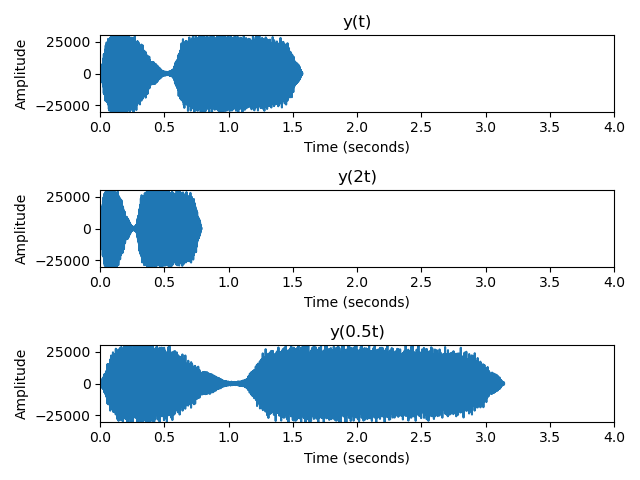

In [67]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part B
# TODO: Code that solves B
fs, y = wav.read('train32.wav')
t = np.arange(0, (len(y)/fs), (1/fs))
print('t = ', t)

# Part C
# TODO: Code that solves C
w, t_w = timescale(y, fs, 2)
v, t_v = timescale(y, fs, 0.5)


#play_obj = sa.play_buffer(y, 1, 2, fs)
#play_obj.wait_done()
#play_obj1 = sa.play_buffer(w, 1, 2, fs)
#play_obj1.wait_done()
#play_obj2 = sa.play_buffer(v, 1, 2, fs)
#play_obj2.wait_done()


# Part D
# TODO: Code that solves D
fig1 = plt.figure(1)
plt.subplot(3, 1, 1)
plt.xlim(0, 4)
plt.ylim(-30000, 30000)
plt.plot(t, y)
plt.title('y(t)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.xlim(0, 4)
plt.ylim(-30000, 30000)
plt.plot(t_w, w)
plt.title('y(2t)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.xlim(0, 4)
plt.ylim(-30000, 30000)
plt.plot(t_v, v)
plt.title('y(0.5t)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.tight_layout()


###  Discussion

#### What would happen if you used a time scaling factor of a=-1?
If we used time scaling factor of a=-1, we would lose our data. All our data starts from when t=0 to a postive time. 

#### Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?
If we ran the figure command before every call to subplot, we would have each subplot in a seperate figure (i.e Figure 1, Figure 2, Figure 3). The plots' data would not change, but rather the placement of the plots in each of the seperate figures. 

## Assignment 2 -- Time Shift Operation

In [46]:
# Assignment 2 - Time Shift Operation

# Part A
# TODO: Code that solves A
# Start with a comment section that explains what the input variables are
# input: a signal x, the sampling frequency fs (in Hz), and a time shift t0 (in seconds).
def timeshift(x, fs, t0):
    n0 = int(abs(t0)*fs)
    zeros = np.zeros(n0)
    # for time delay
    if(t0 < 0):
        y = np.concatenate((zeros, x))
         
    # for neither advance, nor shift (t=0)
    elif(t0 == 0):
        y = x
    
    # for time advance
    else:   
        mod_x = x[n0+1:]
        y = np.concatenate((mod_x, zeros))
        
    t = np.arange(0, len(y), 1) * (1/fs)
    return y, t


<IPython.core.display.Javascript object>


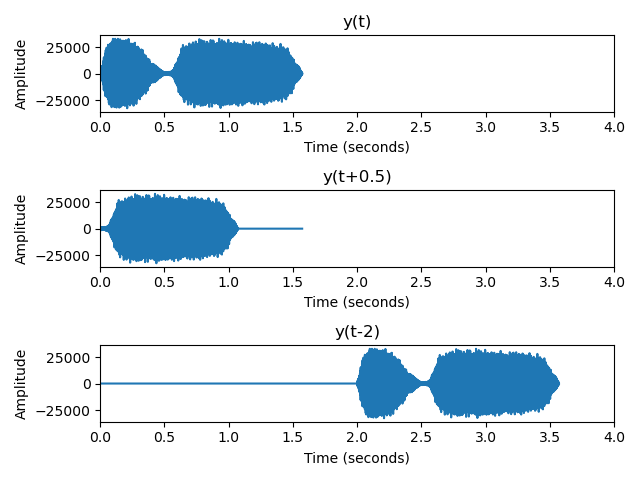

In [48]:
# Assignment 2 - Implementing the time shift function

# Part B
# TODO: Code that solves B
fs, y = wav.read('train32.wav')
t_y = np.arange(0, len(y), 1) * (1/fs) 
w, t_w = timeshift(y, fs, 0.5)
v, t_v = timeshift(y, fs, -2)

fig2 = plt.figure(2)
plt.subplot(3, 1, 1)
plt.xlim(0, 4)
plt.plot(t_y, y)
plt.title('y(t)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.xlim(0, 4)
plt.plot(t_w, w)
plt.title('y(t+0.5)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.xlim(0, 4)
plt.plot(t_v, v)
plt.title('y(t-2)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.tight_layout()

# Part C
# TODO: Code that solves C
#play_obj = sa.play_buffer(y, 1, 2, fs)
#play_obj.wait_done()
#play_obj1 = sa.play_buffer(w, 1, 2, fs)
#play_obj1.wait_done()
#play_obj2 = sa.play_buffer(v, 1, 2, fs)
#play_obj2.wait_done()

###  Discussion

#### There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there a better implementation.

Our implementation works for both cases of a zero shift(y(t) is the same as y(t-0)) and when the shift advance is bigger than the original signal, the signal is moved out of the time window. 

## Assignment 3 -- Recovering Popular TV/Movie Audio File

<IPython.core.display.Javascript object>


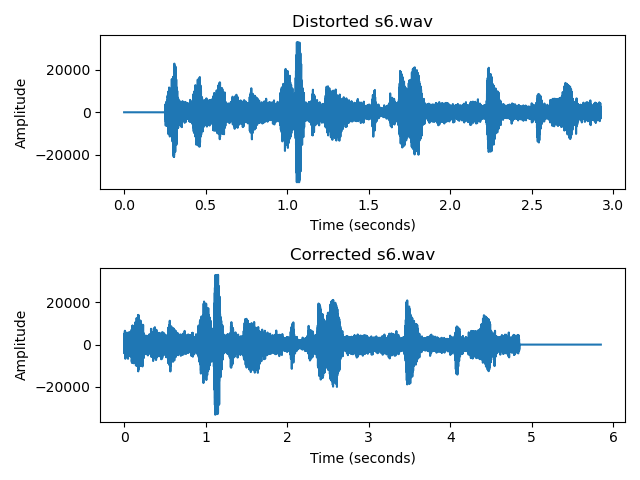

In [69]:
# Assignment 3 -- Recovering Popular TV/Movie Audio File

# Part A
# TODO: Code that solves A
# Part A
# TODO: Code that solves A
fs, y = wav.read('s6.wav')
t_y = np.arange(0, len(y), 1) * (1/fs) 
# y(t) = x(2t-0.5), inverse operation: ya(t) = (0.5t+0.5)
temp1, t_temp1 = timeshift(y, fs, 0.5)
ya, t_a = timescale(temp1, fs, 0.5)
outfile1 = 'ya'
wav.write(outfile1,fs,ya.astype('int16'))

# y(t) = x(0.5t-2), inverse operation: yb(t) = (2t+2)
temp2, t_temp2 = timeshift(y, fs, 2)
yb, t_b = timescale(temp2, fs, 2)
outfile2 = 'yb'
wav.write(outfile2,fs,yb.astype('int16'))

# Part B
# TODO: Code that solves B
#play_obj1 = sa.WaveObject.from_wave_file('ya').play()
#play_obj1.wait_done()
#play_obj2 = sa.WaveObject.from_wave_file('yb').play()
#play_obj2.wait_done()


# Part C
# TODO: Code that solves C
fig3 = plt.figure(3)
plt.subplot(2, 1, 1)
plt.plot(t_y, y)
plt.title('Distorted s6.wav')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t_a, ya)
plt.title('Corrected s6.wav')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.tight_layout()

### Discussion

#### Specify which transformation was used by the mischievous student, and identify the movie or TV show your quote came from.
The student used the transformation y(t) = x(2t-0.5). The quote came from Zootopia. 